#  Predicting price increases for soccer players



This project will try to predict which players will increase their value between seasons 19-20, based on fifa attributes.

Data is extracted from  https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv

### Load Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/Usuario/Desktop/Python_v2/fifa/')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


from sklearn import metrics
from ggplot import * 

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 104)


In [3]:
raw_data_19 = pd.read_csv('../fifa/players_19.csv')
raw_data_20 = pd.read_csv('../fifa/players_20.csv')

### Exploration

In [4]:
print(raw_data_19.shape, raw_data_20.shape)

print(raw_data_20.shape[0] -raw_data_19.shape[0], 'new players in 2020 season')

(17770, 104) (18278, 104)
508 new players in 2020 season


In [5]:
raw_data_20[raw_data_19.columns].shape

# the columns are the same

(18278, 104)

In [6]:
raw_data_19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Eng

In [7]:
raw_data_19.iloc[:,0:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   17770 non-null  int64  
 1   player_url                  17770 non-null  object 
 2   short_name                  17770 non-null  object 
 3   long_name                   17770 non-null  object 
 4   age                         17770 non-null  int64  
 5   dob                         17770 non-null  object 
 6   height_cm                   17770 non-null  int64  
 7   weight_kg                   17770 non-null  int64  
 8   nationality                 17770 non-null  object 
 9   club                        17770 non-null  object 
 10  overall                     17770 non-null  int64  
 11  potential                   17770 non-null  int64  
 12  value_eur                   17770 non-null  int64  
 13  wage_eur                    177

In [8]:
raw_data_19.iloc[:,50:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   skill_curve                17770 non-null  object
 1   skill_fk_accuracy          17770 non-null  object
 2   skill_long_passing         17770 non-null  object
 3   skill_ball_control         17770 non-null  object
 4   movement_acceleration      17770 non-null  object
 5   movement_sprint_speed      17770 non-null  object
 6   movement_agility           17770 non-null  object
 7   movement_reactions         17770 non-null  object
 8   movement_balance           17770 non-null  object
 9   power_shot_power           17770 non-null  object
 10  power_jumping              17770 non-null  object
 11  power_stamina              17770 non-null  object
 12  power_strength             17770 non-null  object
 13  power_long_shots           17770 non-null  object
 14  mental

In [9]:
raw_data_19.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
count,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,1.777000e+04,17770.000000,17770.000000,17770.000000,17770.000000,1.625700e+04,17547.000000,17547.000000,1104.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,213797.776308,25.193922,181.253292,75.310917,66.240405,71.382949,2.440756e+06,9956.162071,1.117783,2.946427,2.346595,4.645685e+06,19.667408,2020.130507,12.143116,67.815319,52.248733,57.082172,62.267169,51.665484,64.972567,65.374622,62.931017,61.511078,66.149043,38.675730,63.088117
std,29955.746535,4.651957,6.745892,7.080013,6.994104,6.145171,5.644779e+06,22330.640048,0.401085,0.659353,0.749672,1.123030e+07,16.112007,1.300184,7.350035,11.329319,14.034645,10.589207,10.442659,16.347564,9.745859,7.807033,7.556389,7.667533,8.234898,10.420846,8.664458
min,164.000000,16.000000,154.000000,50.000000,47.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2018.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,30.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000
25%,199803.000000,21.000000,176.000000,70.000000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,8.000000,2019.000000,6.000000,61.000000,42.000000,50.000000,57.000000,37.000000,59.000000,60.000000,58.000000,56.000000,60.000000,30.000000,57.000000
50%,221350.500000,25.000000,181.000000,75.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000,3.000000,2.000000,1.200000e+06,17.000000,2020.000000,12.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,65.000000,63.000000,61.000000,66.000000,40.000000,63.000000
75%,235967.750000,28.000000,186.000000,80.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.000000,3.000000,3.500000e+06,26.000000,2021.000000,18.000000,75.000000,63.000000,64.000000,69.000000,65.000000,72.000000,71.000000,68.000000,66.000000,72.000000,46.000000,69.000000
max,246063.000000,45.000000,205.000000,110.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,2.281000e+08,99.000000,2026.000000,87.000000,96.000000,93.000000,92.000000,96.000000,91.000000,89.000000,91.000000,92.000000,91.000000,94.000000,65.000000,90.000000


## Data wrangling

The steps to clean the data: 

* Create the target variable

* Transform player features columns to numeric 

* Indentify the categorials columns and create dummies dataframes




**1. Create target variable**

The target variable will be 1 if the player increased his price or 0 otherwise

In [10]:
merge_data = raw_data_20[['sofifa_id', 'value_eur']]
merge_data

,sofifa_id,value_eur
0,158023,95500000
1,20801,58500000
2,190871,105500000
3,200389,77500000
4,183277,90000000
...,...,...
18273,245006,40000
18274,250995,40000
18275,252332,40000
18276,251110,40000


In [11]:
raw_data_19 = raw_data_19.merge(merge_data, on = 'sofifa_id', how = 'inner')
raw_data_19

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur_x,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,value_eur_y
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,58500000
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2,95500000
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,105500000
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000000
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,N

In [12]:
# there are only 13,000 players in common

raw_data_19['y'] = np.where(raw_data_19['value_eur_y'] > raw_data_19['value_eur_x'], 1, 0)

In [13]:
raw_data_19.y.value_counts(1)
# 50% - 50% 

0    0.503576
1    0.496424
Name: y, dtype: float64

**Let´s work without goalkeepers**

In [14]:
raw_data_19 = raw_data_19[raw_data_19['player_positions'] != 'GK']

In [15]:
list_to_drop = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
'gk_speed', 'gk_positioning', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
'goalkeeping_reflexes']
raw_data_19.drop(columns = list_to_drop, inplace = True)

**2. Transform player features columns to numeric**

In [16]:
# We see that since attacking crossing to the last column, the columns are strings and we need them numerical data

In [17]:
len(list_to_drop)

11

In [18]:
raw_data_19.iloc[:,44:104].columns

Index(['skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'value_eur_y',
       'y'],
      dtype='object')

In [19]:

for i in raw_data_19.iloc[:,38:93].columns:
    print(i)
    raw_data_19[i] = raw_data_19[i].str[0:2]
    raw_data_19[i].replace('6-', '60', inplace = True) #particular errors 
    raw_data_19[i].replace('8-', '80', inplace = True)

    raw_data_19[i] = raw_data_19[i].astype(float)

attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking
defending_standing_tackle
defending_sliding_tackle
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb


In [20]:
raw_data_19.iloc[:,38:93].describe()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000
mean,55.198270,50.617163,57.800874,63.787684,47.496146,61.638489,52.226876,47.268585,57.152278,64.370161,68.533659,68.715313,67.121103,63.301131,66.649281,60.536742,66.475163,68.508736,66.636519,52.378554,60.362539,51.390373,55.715656,56.409215,52.635063,61.501884,52.243405,52.891059,50.452809,58.727646,58.727646,58.727646,60.008393,59.691161,59.691161,59.691161,60.008393,59.985612,59.985612,59.985612,60.726276,59.272953,59.272953,59.272953,60.726276,58.503426,57.835988,57.835988,57.835988,58.503426,57.764303,56.506509,56.506509,56.506509,57.764303
std,14.255154,16.638756,11.793142,9.607789,15.024220,12.572943,15.332221,15.273388,12.326533,9.917821,11.722947,11.374451,12.331818,8.764916,12.310079,13.218556,11.657415,11.014392,12.467370,15.919328,14.449891,18.988987,14.940229,13.042092,12.607683,9.934307,17.400190,19.371737,19.491824,9.166487,9.166487,9.166487,9.921081,9.885730,9.885730,9.885730,9.921081,9.782804,9.782804,9.782804,9.250069,8.749324,8.749324,8.749324,9.250069,8.943654,10.064549,10.064549,10.064549,8.943654,9.530446,11.776849,11.776849,11.776849,9.530446
min,11.000000,10.000000,15.000000,26.000000,10.000000,16.000000,11.000000,10.000000,19.000000,25.000000,20.000000,25.000000,23.000000,31.000000,22.000000,14.000000,28.000000,28.000000,27.000000,11.000000,13.000000,10.000000,11.000000,11.000000,13.000000,30.000000,10.000000,10.000000,10.000000,31.000000,31.000000,31.000000,25.000000,27.000000,27.000000,27.000000,25.000000,27.000000,27.000000,27.000000,27.000000,30.000000,30.000000,30.000000,27.000000,31.000000,29.000000,29.000000,29.000000,31.000000,30.000000,27.000000,27.000000,27.000000,30.000000
25%,45.000000,37.000000,49.000000,58.000000,35.000000,56.000000,40.000000,35.000000,50.000000,59.000000,62.000000,63.000000,60.000000,57.000000,60.000000,52.000000,60.000000,62.000000,59.000000,41.000000,51.000000,35.000000,47.000000,48.000000,43.000000,55.000000,38.000000,36.000000,33.000000,52.000000,52.000000,52.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,55.000000,54.000000,54.000000,54.000000,55.000000,52.000000,51.000000,51.000000,51.000000,52.000000,51.000000,47.000000,47.000000,47.000000,51.000000
50%,58.000000,53.000000,58.000000,65.000000,48.000000,64.000000,53.000000,45.000000,59.000000,65.000000,69.000000,69.000000,68.000000,63.000000,68.000000,62.000000,67.000000,69.000000,68.000000,55.000000,62.000000,57.000000,58.000000,58.000000,53.000000,62.000000,57.000000,60.000000,57.000000,59.000000,59.000000,59.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,62.000000,60.000000,60.000000,60

*before 3 step, one more numeric columns with the contract_year & joined*

In [21]:
raw_data_19['year_contract'] = raw_data_19['contract_valid_until'] - raw_data_19.joined.str[0:4].astype(float)

In [22]:
raw_data_19.year_contract.describe()

count    10624.000000
mean         3.946066
std          2.306711
min          0.000000
25%          3.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: year_contract, dtype: float64

**3. Identify categorical data**

In [23]:
raw_data_19.iloc[:,0:44]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur_x,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84.0,94.0,89.0,81.0,87.0,88.0
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77.0,95.0,70.0,90.0,86.0,97.0
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79.0,87.0,62.0,84.0,84.0,96.0
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,"Leadership, Early Crosser, Long Passer (CPU AI...",93.0,83.0,55.0,92.0,82.0,86.0
5,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,32,1986-03-30,184,82,Spain,Real Madrid,91,91,51000000,380000,CB,Right,4,3,3,High/Medium,Normal,Yes,104600000.0,"#Aerial Threat, #Tackling , #Tactician , #Comp...",LCB,4.0,NaN,2005-08-01,2020.0,LCB,15.0,75.0,63.0,71.0,71.0,91.0,84.0,"Dives Into Tackles (CPU AI Only), Leadership, ...",66.0,60.0,91.0,78.0,66.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13139,238985,https://sofifa.com/player/238985/pierce-philli...,P. Phillips,Pierce Phillips,19,1998-09-28,180,72,Republic of Ireland,Cork City,47,61,60000,1000,"CM, CDM",Right,1,3,2,Medium/Medium,Normal,No,131000.0,NaN,SUB,27.0,NaN,2017-01-01,2021.0,NaN,NaN,52.0,32.0,46.0,45.0,46.0,49.0,NaN,31.0,26.0,49.0,55.0,31.0,44.0
13140,240160,https://sofifa.com/player/240160/alexander-kal...,A. Kaltner,Alexander Kaltner,18,1999-10-24,178,75,Germany,SpVgg Unterhaching,47,61,60000,1000,ST,Right,1,3,2,Medium/Medium,Lean,No,125000.0,NaN,RES,24.0,NaN,2017-07-01,2021.0,NaN,NaN,64.0,43.0,40.0,52.0,23.0,53.0,NaN,37.0,48.0,30.0,45.0,43.0,50.0
13141,241304,https://sofifa.com/player/241304/junliang-ma/1...,Ma Junliang,马俊亮,20,1998-03-02,181,64,China PR,Guangzhou R&F FC,47,61,60000,1000,CM,Right,1,3,2,Medium/Medium,Lean,No,167000.0,NaN,LCM,26.0,NaN,2017-01-01,2018.0,NaN,NaN,81.0,35.0,47.0,49.0,44.0,52.0,NaN,40.0,27.0,45.0,58.0,35.0,46.0
13142,240158,https://sofifa.com/player/240158/christoph-ehl...,C. Ehlich,Christoph Ehlich,19,1999-02-02,179,73,Germany,SpVgg Unterhaching,47,59,40000,1000,RB,Right,1,3,2,High/Medium,Lean,No,66000.0,NaN,SUB,33.0,NaN,2017-07

In [24]:
raw_data_19.iloc[:,0:44].columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur_x', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'player_traits', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling'],
      dtype='object')

In [25]:
categorical_list = ['nationality',  'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'team_position', 'loaned_from','nation_position']
raw_data_19[categorical_list]

,nationality,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,team_position,loaned_from,nation_position
0,Portugal,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,LW,NaN,LS
1,Argentina,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,RW,NaN,CF
2,Brazil,"LW, CAM",Right,5,5,5,High/Medium,Neymar,CAM,NaN,LW
4,Belgium,"CAM, CM",Right,4,5,4,High/High,Normal,RCM,NaN,RCM
5,Spain,CB,Right,4,3,3,High/Medium,Normal,LCB,NaN,LCB
...,...,...,...,...,...,...,...,...,...,...,...
13139,Republic of Ireland,"CM, CDM",Right,1,3,2,Medium/Medium,Normal,SUB,NaN,NaN
13140,Germany,ST,Right,1,3,2,Medium/Medium,Lean,RES,NaN,NaN
13141,China PR,CM,Right,1,3,2,Medium/Medium,Lean,LCM,NaN,NaN
13142,Germany,RB,Right,1,3,2,High/Medium,Lean,SUB,NaN,NaN


In [26]:
# Nationality 
dummies_nationality = pd.get_dummies(raw_data_19.nationality)

print(dummies_nationality.shape)
dummies_nationality.head()

(11676, 148)


,Afghanistan,Albania,Algeria,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nigeria,Northern Ireland,Norway,Palestine,Panama,Paraguay,Peru,Poland,Portugal,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# player position 
raw_data_19.player_positions.value_counts()

# The format is not correct 
# there are players that can play in one or more positions

CB                  1639
ST                  1252
CDM, CM              520
CM                   513
LB                   456
                    ... 
RB, RM, RW, LB         1
LWB, LB, RB, RWB       1
LW, RW, CM             1
CAM, CM, RWB           1
RB, RWB, RM, RW        1
Name: player_positions, Length: 770, dtype: int64

In [28]:
dummies_1 = pd.get_dummies(raw_data_19["player_positions"].str.split(',',expand=True)[0]) 

# we have white spaces in the name of colunmns 
dummies_2 =pd.get_dummies(raw_data_19["player_positions"].str.split(',',expand=True)[1])
dummies_2.set_axis(['CAM', 'CB', 'CDM', 'CF', 'CM',  'LB', 'LM', 'LW', 'LWB', 'RB',
       'RM', 'RW', 'RWB', 'ST'], axis = 1,  inplace = True)

dummies_3 =pd.get_dummies(raw_data_19["player_positions"].str.split(',',expand=True)[2])
dummies_3.set_axis(['CAM', 'CB', 'CDM', 'CF', 'CM',  'LB', 'LM', 'LW', 'LWB', 'RB',
       'RM', 'RW', 'RWB', 'ST'], axis = 1,  inplace = True)

dummies_4 =pd.get_dummies(raw_data_19["player_positions"].str.split(',',expand=True)[3])
dummies_4.set_axis(['CAM', 'CB', 'CDM', 'CF', 'CM',  'LB', 'LM', 'LW', 'LWB', 'RB',
       'RM', 'RW', 'RWB', 'ST'], axis = 1,  inplace = True)


In [29]:
dummies_position = pd.DataFrame()
for i in dummies_1.columns:
        dummies_position[i] = dummies_1[i] + dummies_2[i] +dummies_3[i] +dummies_4[i]

In [30]:
dummies_position

,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13139,0,0,1,0,1,0,0,0,0,0,0,0,0,0
13140,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13141,0,0,0,0,1,0,0,0,0,0,0,0,0,0
13142,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [31]:
raw_data_19[categorical_list]

,nationality,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,team_position,loaned_from,nation_position
0,Portugal,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,LW,NaN,LS
1,Argentina,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,RW,NaN,CF
2,Brazil,"LW, CAM",Right,5,5,5,High/Medium,Neymar,CAM,NaN,LW
4,Belgium,"CAM, CM",Right,4,5,4,High/High,Normal,RCM,NaN,RCM
5,Spain,CB,Right,4,3,3,High/Medium,Normal,LCB,NaN,LCB
...,...,...,...,...,...,...,...,...,...,...,...
13139,Republic of Ireland,"CM, CDM",Right,1,3,2,Medium/Medium,Normal,SUB,NaN,NaN
13140,Germany,ST,Right,1,3,2,Medium/Medium,Lean,RES,NaN,NaN
13141,China PR,CM,Right,1,3,2,Medium/Medium,Lean,LCM,NaN,NaN
13142,Germany,RB,Right,1,3,2,High/Medium,Lean,SUB,NaN,NaN


In [32]:
# loaned from 
raw_data_19.loaned_from.isna().sum() #most of players there are not loaned

10708

In [33]:
raw_data_19.loaned_from.value_counts()

Sassuolo            18
Atalanta            16
Juventus            15
SL Benfica          14
Sporting CP         12
                    ..
Granada CF           1
Northampton Town     1
VfL Bochum 1848      1
Vélez Sarsfield      1
Cork City            1
Name: loaned_from, Length: 297, dtype: int64

In [34]:
raw_data_19['loaned_from']  = np.where(raw_data_19.loaned_from.isna(), 'loaned', 'not_loaned')

In [35]:
dummie_loaned = pd.get_dummies(raw_data_19.loaned_from)
print(dummie_loaned.shape)
dummie_loaned.head()

(11676, 2)


,loaned,not_loaned
0,1,0
1,1,0
2,1,0
4,1,0
5,1,0


In [36]:
# preferred foot
raw_data_19.preferred_foot.value_counts()

dummies_pf = pd.get_dummies(raw_data_19.preferred_foot)

print(dummies_pf.shape)
dummies_pf.head()

(11676, 2)


,Left,Right
0,0,1
1,1,0
2,0,1
4,0,1
5,0,1


In [37]:
# international reputation
raw_data_19.international_reputation.value_counts()
dummies_ir = pd.get_dummies(raw_data_19.international_reputation, prefix='ir')

print(dummies_ir.shape)
dummies_ir.head()

(11676, 5)


,ir_1,ir_2,ir_3,ir_4,ir_5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
4,0,0,0,1,0
5,0,0,0,1,0


In [38]:
# weak_foot
raw_data_19.weak_foot.value_counts()
dummies_wf = pd.get_dummies(raw_data_19.weak_foot, prefix='wf')

print(dummies_wf.shape)
dummies_wf.head()

(11676, 5)


,wf_1,wf_2,wf_3,wf_4,wf_5
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
4,0,0,0,0,1
5,0,0,1,0,0


In [39]:
# Skill moves
raw_data_19.skill_moves.value_counts()
dummies_sk = pd.get_dummies(raw_data_19.skill_moves, prefix='sk')

print(dummies_sk.shape)
dummies_sk.head()

(11676, 4)


,sk_2,sk_3,sk_4,sk_5
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
4,0,0,1,0
5,0,1,0,0


In [40]:
# work rate
raw_data_19.work_rate.value_counts()

dummies_wr = pd.get_dummies(raw_data_19.work_rate, prefix='wr')

print(dummies_wr.shape)
dummies_wr.head()

(11676, 9)


,wr_High/High,wr_High/Low,wr_High/Medium,wr_Low/High,wr_Low/Low,wr_Low/Medium,wr_Medium/High,wr_Medium/Low,wr_Medium/Medium
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0


In [41]:
#body type
raw_data_19.body_type.value_counts()


Normal                 6624
Lean                   4378
Stocky                  668
Neymar                    1
Shaqiri                   1
PLAYER_BODY_TYPE_25       1
C. Ronaldo                1
Messi                     1
Akinfenwa                 1
Name: body_type, dtype: int64

In [42]:
# there are players with their own body style 
#fortunately there are not many of them and they are characteristic let's classify them by hand

#C. Ronaldo , we understand as normal the appropriate weight for the height of that player
raw_data_19['body_type'] = np.where(raw_data_19['body_type'] == 'C. Ronaldo', 'Normal',raw_data_19['body_type'])

# a PLAYER_BODY_TYPE_25 we will give it a normal body which is the most probable value
raw_data_19['body_type'] = np.where(raw_data_19['body_type'] == 'PLAYER_BODY_TYPE_25', 'Normal',raw_data_19['body_type'])

#Akinfenwa  is clearly the image of a stocke player (search)
raw_data_19['body_type'] = np.where(raw_data_19['body_type'] == 'Akinfenwa', 'Normal',raw_data_19['body_type'])

#Shaqiri a bit of discussion could take place, but let's choose normal
raw_data_19['body_type'] = np.where(raw_data_19['body_type'] == 'Shaqiri', 'Normal',raw_data_19['body_type'])

# Messi has a normal body for his height
raw_data_19['body_type'] = np.where(raw_data_19['body_type'] == 'Messi', 'Normal',raw_data_19['body_type'])

# Courtois same as messi
raw_data_19['body_type'] = np.where(raw_data_19['body_type'] == 'Courtois', 'Normal',raw_data_19['body_type'])

# Neymar if we could say that he is slim.
raw_data_19['body_type'] = np.where(raw_data_19['body_type'] == 'Neymar', 'Lean',raw_data_19['body_type'])

In [43]:
dummies_body_type = pd.get_dummies(raw_data_19.body_type, prefix='bt')
dummies_body_type.shape
dummies_body_type.head()

,bt_Lean,bt_Normal,bt_Stocky
0,0,1,0
1,0,1,0
2,1,0,0
4,0,1,0
5,0,1,0


In [44]:
# team_position and nation_position we can drop it, beacuse we have player_position

**Dummies**

* dummies_nationality
* dummies_posicion
* dummies_pf
* dummies_ir
* dummies_wf
* dummies_sk
* dummies_wr
* dummies_body_type


In [45]:
raw_data_19[categorical_list]

,nationality,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,team_position,loaned_from,nation_position
0,Portugal,"ST, LW",Right,5,4,5,High/Low,Normal,LW,loaned,LS
1,Argentina,"CF, RW, ST",Left,5,4,4,Medium/Medium,Normal,RW,loaned,CF
2,Brazil,"LW, CAM",Right,5,5,5,High/Medium,Lean,CAM,loaned,LW
4,Belgium,"CAM, CM",Right,4,5,4,High/High,Normal,RCM,loaned,RCM
5,Spain,CB,Right,4,3,3,High/Medium,Normal,LCB,loaned,LCB
...,...,...,...,...,...,...,...,...,...,...,...
13139,Republic of Ireland,"CM, CDM",Right,1,3,2,Medium/Medium,Normal,SUB,loaned,NaN
13140,Germany,ST,Right,1,3,2,Medium/Medium,Lean,RES,loaned,NaN
13141,China PR,CM,Right,1,3,2,Medium/Medium,Lean,LCM,loaned,NaN
13142,Germany,RB,Right,1,3,2,High/Medium,Lean,SUB,loaned,NaN


In [46]:

dummie_dataset = pd.concat([dummies_position, dummies_pf,dummie_loaned,
           dummies_ir,dummies_wf,dummies_sk,dummies_wr,
          dummies_body_type, dummies_nationality], axis = 1)

In [47]:
dummie_dataset.head()

,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,Left,Right,loaned,not_loaned,ir_1,ir_2,ir_3,ir_4,ir_5,wf_1,wf_2,wf_3,wf_4,wf_5,sk_2,sk_3,sk_4,sk_5,wr_High/High,wr_High/Low,wr_High/Medium,wr_Low/High,wr_Low/Low,wr_Low/Medium,wr_Medium/High,wr_Medium/Low,wr_Medium/Medium,bt_Lean,bt_Normal,bt_Stocky,Afghanistan,Albania,Algeria,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nigeria,Northern Ireland,Norway,Palestine,Panama,Paraguay,Peru,Poland,Portugal,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**3.1 Save numeric data**

We have categorical data lets save numeric data and prepare train and test datasets

In [48]:
raw_data_19.iloc[:,0:50].head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur_x,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,Normal,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,loaned,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Normal,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,loaned,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Lean,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,loaned,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,loaned,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,"Leadership, Early Crosser, Long Passer (CPU AI...",93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0
5,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,32,1986-03-30,184,82,Spain,Real Madrid,91,91,51000000,380000,CB,Right,4,3,3,High/Medium,Normal,Yes,104600000.0,"#Aerial Threat, #Tackling , #Tactician , #Comp...",LCB,4.0,loaned,2005-08-01,2020.0,LCB,15.0,75.0,63.0,71.0,71.0,91.0,84.0,"Dives Into Tackles (CPU AI Only), Leadership, ...",66.0,60.0,91.0,78.0,66.0,61.0,73.0,67.0,72.0,84.0,76.0,75.0


In [49]:
raw_data_19.iloc[:,0:50].columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur_x', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'player_traits', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed'],
      dtype='object')

In [50]:
raw_data_19.iloc[:,50:].columns

Index(['movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'value_eur_y', 'y',
       'year_contract'],
      dtype='object')

In [51]:
list_numeric = [ 'age', 'height_cm', 'weight_kg','overall', 'potential','value_eur_x', 'wage_eur', 'release_clause_eur',
                 'team_jersey_number', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling','skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle',  'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'year_contract']

In [52]:
raw_data_19[list_numeric]

,age,height_cm,weight_kg,overall,potential,value_eur_x,wage_eur,release_clause_eur,team_jersey_number,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year_contract
0,33,187,83,94,94,77000000,405000,127100000.0,7.0,7.0,90.0,93.0,81.0,89.0,35.0,79.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,4.0
1,31,170,72,94,94,110500000,565000,226500000.0,10.0,10.0,88.0,91.0,88.0,96.0,32.0,61.0,77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,90.0,84.0,84.0,84.0,90.0,63.0,61.0,61.0,61.0,63.0,58.0,47.0,47.0,47.0,58.0,17.0
2,26,175,68,92,93,118500000,290000,228100000.0,10.0,10.0,92.0,84.0,83.0,95.0,32.0,59.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,5.0
4,27,181,70,91,92,102000000,355000,196400000.0,17.0,7.0,77.0,86.0,92.0,87.0,60.0,78.0,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,88.0,67.0,58.0,51.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,8.0
5,32,184,82,91,91,51000000,380000,104600000.0,4.0,15.0,75.0,63.0,71.0,71.0,91.0,84.0,66.0,60.0,91.0,78.0,66.0,61.0,73.0,67.0,72.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,55.0,84.0,90.0,52.0,63.0,68.0,80.0,89.0,92.0,91.0,71.0,71.0,71.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,70.0,74.0,74.0,74.0,70.0,82.0,83.0,83.0,83.0,82.0,84.0,87.0,87.0,87.0,84.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13139,19,180,72,47,61,60000,1000,131000.0,27.0,NaN,52.0,32.0,46.0,45.0,46.0,49.0,31.0,26.0,49.0,55.0,31.0,44.0,30.0,31.0,50.0,41.0,55.0,49.0,51.0,53.0,65.0,46.0,60.0,44.0,49.0,28.0,51.0,49.0,31.0,51.0,40.0,35.0,41.0,44.0,53.0,40.0,40.0,40.0,42.0,42.0,42.0,42.0,42.0,44.0,44.0,44.0,43.0,46.0,46.0,46.0,43.0,46.0,48.0,48.0,48.0,46.0,46.0,48.0,48.0,48.0,46.0,4.0
13140,18,178,75,47,61,60000,1000,125000.0,24.0,NaN,64.0,43.0,40.0,52.0,23.0,53.0,37.0,48.0,30.0,45.0,43.0,50.0,41.0,38.0,30.0,51.0,62.0,66.0,67.0,39.0,70.0,38.0,81.0,55.0,60.0,35.0,28.0,25.0,43.0,41.0,48.0,37.0,28.0,15.0,22.0,45.0,45.0,45.0,48.0,46.0,46.0,46.0,48.0,46.0,46.0,46.0,47.0,40.0,40.0,40.0,47.0,38.0,34.0,34.0,34.0,38.0,36.0,32.0,32.0,32.0,36.0,4.0
13141,20,181,64,47,61,60000,1000,167000.0,26.0,NaN,81.0,35.0,47.0,49.0,44.0,52.0,40.0,27.0,45.0,58.0,35.0,46.0,39.0,37.0,47.0,42.0,84.0,78.0,78.0,45.0,70.0,48.0,59.0,58.0,45.0,35.0,58.0,41.0,48.0,40.0,36.0,39.0,54.0,37.0,40.0,45.0,45.0,45.0,48.0,47.0,47.0,47.0,48.0,48.0,48.0,48.0,49.0,46.0,46.0,46.0,49.0,49.0,46.0,46.0,46.0,4

In [53]:
raw_data_19[list_numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11676 entries, 0 to 13143
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         11676 non-null  int64  
 1   height_cm                   11676 non-null  int64  
 2   weight_kg                   11676 non-null  int64  
 3   overall                     11676 non-null  int64  
 4   potential                   11676 non-null  int64  
 5   value_eur_x                 11676 non-null  int64  
 6   wage_eur                    11676 non-null  int64  
 7   release_clause_eur          10621 non-null  float64
 8   team_jersey_number          11592 non-null  float64
 9   nation_jersey_number        812 non-null    float64
 10  pace                        11676 non-null  float64
 11  shooting                    11676 non-null  float64
 12  passing                     11676 non-null  float64
 13  dribbling                   116

## preparing train and test

In [54]:
X_numeric = raw_data_19[list_numeric]

In [55]:
X_numeric.isna().sum()

age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
value_eur_x                       0
wage_eur                          0
release_clause_eur             1055
team_jersey_number               84
nation_jersey_number          10864
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed       

In [56]:
#from sklearn.preprocessing import normalize

In [57]:
X_numeric.fillna(X_numeric.mean(), inplace = True)
# fillna with 0, is the best solution?

In [58]:
X_numeric.describe()

,age,height_cm,weight_kg,overall,potential,value_eur_x,wage_eur,release_clause_eur,team_jersey_number,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year_contract
count,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,1.167600e+04,11676.000000,1.167600e+04,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000,11676.000000
mean,24.960003,180.590271,74.640202,67.574426,72.679428,3.140782e+06,12503.425831,6.018347e+06,18.778899,12.226601,68.641401,53.177287,58.219938,63.365194,52.687992,65.867849,55.198270,50.617163,57.800874,63.787684,47.496146,61.638489,52.226876,47.268585,57.152278,64.370161,68.533659,68.715313,67.121103,63.301131,66.649281,60.536742,66.475163,68.508736,66.636519,52.378554,60.362539,51.390373,55.715656,56.409215,52.635063,61.501884,52.243405,52.891059,50.452809,58.727646,58.727646,58.727646,60.008393,59.691161,59.691161,59.691161,60.008393,59.985612,59.985612,59.985612,60.726276,59.272953,59.272953,59.272953,60.726276,58.503426,57.835988,57.835988,57.835988,58.503426,57.764303,56.506509,56.506509,56.506509,57.764303,3.946066
std,4.298422,6.439665,6.733225,6.746688,6.047217,6.491454e+06,25807.750546,1.233249e+07,15.199894,1.921239,11.143362,14.145300,10.448221,10.376191,16.466342,9.595935,14.255154,16.638756,11.793142,9.607789,15.024220,12.572943,15.332221,15.273388,12.326533,9.917821,11.722947,11.374451,12.331818,8.764916,12.310079,13.218556,11.657415,11.014392,12.467370,15.919328,14.449891,18.988987,14.940229,13.042092,12.607683,9.934307,17.400190,19.371737,19.491824,9.166487,9.166487,9.166487,9.921081,9.885730,9.885730,9.885730,9.921081,9.782804,9.782804,9.782804,9.250069,8.749324,8.749324,8.749324,9.250069,8.943654,10.064549,10.064549,10.064549,8.943654,9.530446,11.776849,11.776849,11.776849,9.530446,2.200333
min,16.000000,156.000000,50.000000,47.000000,51.000000,0.000000e+00,0.000000,1.800000e+04,2.000000,2.000000,25.000000,15.000000,24.000000,23.000000,15.000000,30.000000,11.000000,10.000000,15.000000,26.000000,10.000000,16.000000,11.000000,10.000000,19.000000,25.000000,20.000000,25.000000,23.000000,31.000000,22.000000,14.000000,28.000000,28.000000,27.000000,11.000000,13.000000,10.000000,11.000000,11.000000,13.000000,30.000000,10.000000,10.000000,10.000000,31.000000,31.000000,31.000000,25.000000,27.000000,27.000000,27.000000,25.000000,27.000000,27.000000,27.000000,27.000000,30.000000,30.000000,30.000000,27.000000,31.000000,29.000000,29.000000,29.000000,31.000000,30.000000,27.000000,27.000000,27.000000,30.000000,0.000000
25%,22.000000,176.000000,70.000000,63.000000,68.000000,4.5000

#### Normalize numeric data and concat with dummies

In [59]:
df_norm = (X_numeric - X_numeric.min())/(X_numeric.max() - X_numeric.min())
df_norm

,age,height_cm,weight_kg,overall,potential,value_eur_x,wage_eur,release_clause_eur,team_jersey_number,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year_contract
0,0.68,0.659574,0.550000,1.000000,0.977273,0.649789,0.716814,0.557177,0.051546,0.058824,0.915493,1.000000,0.838235,0.904110,0.263158,0.830508,0.890244,0.988235,0.936709,0.820896,0.9625,0.888889,0.843373,0.785714,0.783784,0.971831,0.896104,0.929577,0.876712,1.000000,0.648649,1.000000,1.000000,0.882353,0.742857,0.987952,0.609756,0.231707,1.000000,0.855422,0.911392,0.984848,0.216867,0.253012,0.160494,1.000000,1.000000,1.000000,0.955224,0.954545,0.954545,0.954545,0.955224,0.924242,0.924242,0.924242,0.968254,0.879310,0.879310,0.879310,0.968254,0.618182,0.551724,0.551724,0.551724,0.618182,0.563636,0.433333,0.433333,0.433333,0.563636,0.190476
1,0.60,0.297872,0.366667,1.000000,0.977273,0.932489,1.000000,0.992985,0.082474,0.094118,0.887324,0.974359,0.941176,1.000000,0.223684,0.525424,0.804878,1.000000,0.696203,0.955224,0.9500,1.000000,0.987952,1.000000,0.918919,1.000000,0.922078,0.859155,0.931507,0.984615,0.986486,0.876543,0.597015,0.647059,0.457143,1.000000,0.426829,0.146341,0.988095,1.000000,0.784810,1.000000,0.277108,0.216867,0.197531,0.950000,0.950000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,1.000000,0.581818,0.551724,0.551724,0.551724,0.581818,0.509091,0.333333,0.333333,0.333333,0.509091,0.809524
2,0.40,0.404255,0.300000,0.957447,0.954545,1.000000,0.513274,1.000000,0.082474,0.094118,0.943662,0.884615,0.867647,0.986301,0.223684,0.491525,0.829268,0.905882,0.594937,0.865672,0.9250,0.987654,0.927711,0.916667,0.797297,0.985915,0.961039,0.915493,1.000000,0.969231,0.837838,0.814815,0.492537,0.779412,0.314286,0.855422,0.524390,0.317073,0.928571,0.915663,0.860759,0.969697,0.204819,0.168675,0.283951,0.883333,0.883333,0.883333,0.955224,0.939394,0.939394,0.939394,0.955224,0.939394,0.939394,0.939394,0.968254,0.879310,0.879310,0.879310,0.968254,0.618182,0.534483,0.534483,0.534483,0.618182,0.545455,0.333333,0.333333,0.333333,0.545455,0.238095
4,0.44,0.531915,0.333333,0.936170,0.931818,0.860759,0.628319,0.861015,0.154639,0.058824,0.732394,0.910256,1.000000,0.876712,0.592105,0.813559,1.000000,0.858824,0.506329,0.985075,0.9000,0.864198,0.891566,0.869048,0.972973,0.929577,0.753247,0.718310,0.767123,0.923077,0.743243,0.950617,0.522388,0.911765,0.685714,0.963855,0.768293,0.609756,0.904762,1.000000,0.835443,0.878788,0.686747,0.578313,0.506173,0.850000,0.850000,0.850000,0.925373,0.909091,0.909091,0.909091,0.925373,0.924242,0.924242,0.924242,0.968254,0.982759,0.982759,0.982759,0.968254,0.836364,0.827586,0.827586,0.827586,0.836364,0.781818,0.650000,0.650000,0.650000,0.781818,0.380952
5,0.64,0.595745,0.533333,0.936170,0.909091,0.430380,0.672566,0.458528,0.020619,0.152941,0.704225,0.615385,0.691176,0.657534,1.000000,0.915254,0.670732,0.588235,0.962025,0.776119,0.7000,0.555556,0.746988,0.678571,0.716216,0.830986,0.727273,0.704225,0.753425,0.830769,0.594595,0.802469,0.970149,0.823529,0.800000,0.530120,0.865854,0.975610,0.488095,0.626506,0.696203,0.757576,0.951807,0.987952,1.000000,0.666667,0.666667,0.666667,0.656716,0.636364,0.636364,0.636364,0.656716,0.636364,0.636364,0.636364,0.682540,0.758621,0.758621,0.758621,0.682540,0.927273,0.931034,0.931034,0.931034,0.927273

In [60]:
dummie_dataset

,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,Left,Right,loaned,not_loaned,ir_1,ir_2,ir_3,ir_4,ir_5,wf_1,wf_2,wf_3,wf_4,wf_5,sk_2,sk_3,sk_4,sk_5,wr_High/High,wr_High/Low,wr_High/Medium,wr_Low/High,wr_Low/Low,wr_Low/Medium,wr_Medium/High,wr_Medium/Low,wr_Medium/Medium,bt_Lean,bt_Normal,bt_Stocky,Afghanistan,Albania,Algeria,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nigeria,Northern Ireland,Norway,Palestine,Panama,Paraguay,Peru,Poland,Portugal,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [61]:
X = pd.concat([df_norm, dummie_dataset], axis = 1)

In [62]:
Y = raw_data_19['y']

In [63]:
X.shape

(11676, 264)

In [64]:
Y.shape

(11676,)

In [65]:
#X.to_pickle('X_nogk.pkl')

In [66]:
#Y.to_pickle('Y_nogk.pkl')

## Model

In [67]:
# LOAD DATA
X = pd.read_pickle('../fifa/X_nogk.pkl')
Y = pd.read_pickle('../fifa/Y_nogk.pkl')

In [68]:
X

,age,height_cm,weight_kg,overall,potential,value_eur_x,wage_eur,release_clause_eur,team_jersey_number,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year_contract,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,Left,Right,loaned,not_loaned,ir_1,ir_2,ir_3,ir_4,ir_5,wf_1,wf_2,wf_3,wf_4,wf_5,sk_1,sk_2,sk_3,sk_4,sk_5,wr_High/High,wr_High/Low,wr_High/Medium,wr_Low/High,wr_Low/Low,wr_Low/Medium,wr_Medium/High,wr_Medium/Low,wr_Medium/Medium,bt_Lean,bt_Normal,bt_Stocky,Afghanistan,Albania,Algeria,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nigeria,Northern Ireland,Norway,Palestine,Panama,Paraguay,Peru,Poland,Portugal,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe
0,0.68,0.659574,0.550000,1.000000,0.977273,0.649789,0.716814,0.557187,0.061224,0.069767,0.915493,1.000000,0.838235,0.904110,0.263158,0.830508,0.897727,0.989247,0.944444,0.853659,0.965116,0.903226,0.852273,0.795455,0.811765,0.977273,0.905882,0.939759,0.888889,1.000000,0.6750,1.000000,1.000000,0.903614,0.7750,0.988889,0.619048,0.275862,1.000000,0.857143,0.916667,0.988095,0.277778,0.287356,0.227273,1.000000,1.000000,1.000000,0.955224,0.954545,0.954545,0.954545,0.955224,0.924242,0.924242,0.924242,0.968254,0.879310,0.879310,0.879310,0.968254,0.618182,0.551724,0.551724,0.551724,0.618182,0.563636,0.433333,0.433333,0.433333,0.563636,0.173913,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.60,0.297872,0.366667,1.000000,0.977273,0.932489,1.000000,0.992985,0.091837,0.104651,0.887324,0.974359,0.941176,1.000000,0.223684,0.525424,0.818182,1.000000,0.733333,0.963415,0.953488,1.000000,0.988636,1.000000,0.929412,1.000000,0.929412,0.879518,0.938272,0.984848,0.9875,0.891304,0.658228,0.710843,0.5250,1.000000,0.440476,0.195402,0.989247,1.000000,0.797619,1.000000,0.333333,0.252874,0.261364,0.950000,0.950000,0.950000,1.000000,1.000000,1.000000,1.00

In [69]:
Y

0        0
1        0
2        0
4        0
5        0
        ..
13139    0
13140    1
13141    1
13142    1
13143    0
Name: y, Length: 12595, dtype: int32

**train_test_split**

In [70]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1998)

**Logistic Regression**

In [71]:
lm = LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

In [72]:
lm.score(X_train,Y_train)

0.6822822141560798

### AUC - ROC curve

In [73]:
probs = lm.predict_proba(X_test)
preds = probs[:,1]


In [74]:
preds

array([0.79126207, 0.2834219 , 0.28719192, ..., 0.52336227, 0.29245685,
       0.16930243])

In [75]:
espc_1, sens, _ = metrics.roc_curve(Y_test, preds)

In [76]:
roc_auc = metrics.auc(espc_1, sens)

In [77]:
df = pd.DataFrame(
{
    'x': espc_1,
    'y':sens
})

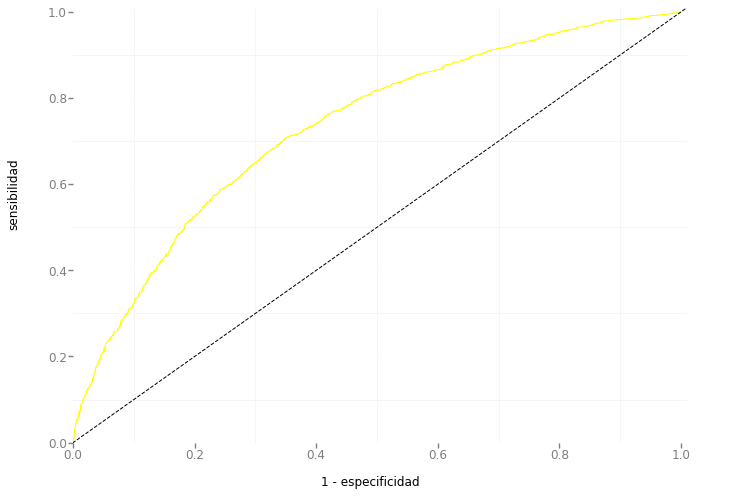

<ggplot: (107299789487)>

In [78]:
ggplot(df, aes(x = 'x', y = 'y')) +  geom_line(aes(color = 'yellow')) +geom_abline(aes(colour = 'black'),linetype = '--' ) + xlab('1 - especificidad') +ylab('sensibilidad') + xlim(0,1.01) + ylim(0, 1.01) + theme_bw()

In [79]:
metrics.roc_auc_score(lm.predict(X_test), Y_test)

0.6771654845024122

# Next Steps

* Create the model with cross-validation instead of train test split
* Try others models 